In [1]:
#importation
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '../scripts')
import clean_data

In [3]:
#load data
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(parent_dir, "data", "Week1_challenge_data_source.csv")                             
db = pd.read_csv(data_path)
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
#column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [5]:
#number of data points
print(f"There are {db.shape[0]} rows and {db.shape[1]} columns")

There are 150001 rows and 55 columns


## Handling missing values

In [6]:
# what is the % of missing values in the dataset?
missing_percentage = clean_data.percent_missing(db)
print(missing_percentage)

The TellCo dataset contains 12.5 % missing values.
None


In [7]:
#displays the datatype of columns
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [8]:
#calculate percentage of missed values
percent_missing = db.isnull().sum() * 100 / len(db)
missing_value_db = pd.DataFrame({'percentage_of_missed_values': percent_missing})
print(missing_value_db)

                                          percentage_of_missed_values
Bearer Id                                                    0.660662
Start                                                        0.000667
Start ms                                                     0.000667
End                                                          0.000667
End ms                                                       0.000667
Dur. (ms)                                                    0.000667
IMSI                                                         0.379997
MSISDN/Number                                                0.710662
IMEI                                                         0.381331
Last Location Name                                           0.768662
Avg RTT DL (ms)                                             18.552543
Avg RTT UL (ms)                                             18.541210
Avg Bearer TP DL (kbps)                                      0.000667
Avg Bearer TP UL (kb

In [9]:
#modify data frame by removing null values above 30%
perc = 30.0
min_count = int(((100-perc)/100)*db.shape[0] +1)
mod_db = db.dropna(axis=1, thresh=min_count)
print("Modified Dataframe Columns: ")
mod_db.columns.tolist()

Modified Dataframe Columns: 


['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [10]:
import warnings

with warnings.catch_warnings(record=True):
#store object type columns and numberic type columns in different lists
    modified = clean_data.handle_missing_values(db)
    filled = clean_data.fill_missing_values(modified)
filled.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [11]:
#after removing above 30% null values and fill null values for object types and numeric types
percent_missing = filled.isnull().sum() * 100 / len(filled)
missing_value_db = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_db)

                                percent_missing
Bearer Id                                   0.0
Start                                       0.0
Start ms                                    0.0
End                                         0.0
End ms                                      0.0
Dur. (ms)                                   0.0
IMSI                                        0.0
MSISDN/Number                               0.0
IMEI                                        0.0
Last Location Name                          0.0
Avg RTT DL (ms)                             0.0
Avg RTT UL (ms)                             0.0
Avg Bearer TP DL (kbps)                     0.0
Avg Bearer TP UL (kbps)                     0.0
DL TP < 50 Kbps (%)                         0.0
50 Kbps < DL TP < 250 Kbps (%)              0.0
250 Kbps < DL TP < 1 Mbps (%)               0.0
DL TP > 1 Mbps (%)                          0.0
UL TP < 10 Kbps (%)                         0.0
10 Kbps < UL TP < 50 Kbps (%)           

In [12]:
mod_db_handsets = pd.DataFrame({'number of users':filled.groupby(['Handset Type'])['Bearer Id'].count()}).reset_index()
mod_db_handsets = mod_db_handsets.sort_values(['number of users'],ascending=False)
print("\nTOP TEN HANDSETS USED BY CUSTOMERS\n")
mod_db_handsets.head(10)


TOP TEN HANDSETS USED BY CUSTOMERS



,Handset Type,number of users
316,Huawei B528S-23A,20324
53,Apple iPhone 6S (A1688),9419
49,Apple iPhone 6 (A1586),9023
1395,undefined,8987
59,Apple iPhone 7 (A1778),6326
73,Apple iPhone Se (A1723),5187
66,Apple iPhone 8 (A1905),4993
78,Apple iPhone Xr (A2105),4568
955,Samsung Galaxy S8 (Sm-G950F),4520
75,Apple iPhone X (A1901),3813


In [13]:
filled.shape

(150001, 45)

In [13]:
#top 3 handset manufacturers
mod_db_handset_manf = pd.DataFrame({'handsets manufactured':filled.groupby(['Handset Manufacturer'])['Bearer Id'].count()}).reset_index()
mod_db_handset_manf = mod_db_handset_manf.sort_values(['handsets manufactured'],ascending=False).reset_index()
print('\nTOP THREE HANDSET MANUFACTURERES\n')
mod_db_handset_manf.head(3)


TOP THREE HANDSET MANUFACTURERES



,index,Handset Manufacturer,handsets manufactured
0,5,Apple,60137
1,103,Samsung,40839
2,52,Huawei,34423


In [14]:
#top 5 handsets per top 3 handset manufacturer
# df_handset_manf[df_handset_manf["Handset Manufacturer"] == "Apple"]
mod_db_handset_apple = filled.groupby(['Handset Manufacturer']).get_group('Apple')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
mod_db_handset_samsung = filled.groupby(['Handset Manufacturer']).get_group('Samsung')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
mod_db_handset_huawei= filled.groupby(['Handset Manufacturer']).get_group('Huawei')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
print("\nTOP FIVE HANDSETS FROM APPLE\n")
print(mod_db_handset_apple.head(5),"\n\n")
print("\nTOP FIVE HANDSETS FROM SUNMSUNG\n")
print(mod_db_handset_samsung.head(5),"\n\n")
print("\nTOP FIVE HANDSETS FROM HUAWEI\n")
print(mod_db_handset_huawei.head(5))


TOP FIVE HANDSETS FROM APPLE

                      Handset Type     Bearer Id
85228  Apple iPhone 6 Plus (A1524)  1.318650e+19
92010      Apple iPhone 6S (A1688)  1.318650e+19
8452        Apple iPhone 8 (A1905)  1.318650e+19
57870      Apple iPhone 6S (A1688)  1.318650e+19
24695       Apple iPhone 6 (A1549)  1.318650e+19 



TOP FIVE HANDSETS FROM SUNMSUNG

                        Handset Type     Bearer Id
117816  Samsung Galaxy S7 (Sm-G930X)  1.318650e+19
22779       Samsung Galaxy A8 (2018)  1.318650e+19
19847     Samsung Galaxy A5 Sm-A520F  1.318650e+19
24249    Samsung Galaxy J3 (Sm-J330)  1.318650e+19
15141   Samsung Galaxy S8 (Sm-G950F)  1.318650e+19 



TOP FIVE HANDSETS FROM HUAWEI

            Handset Type     Bearer Id
3651    Huawei B525S-23A  1.318650e+19
61439   Huawei B525S-23A  1.318650e+19
121426  Huawei B525S-23A  1.318650e+19
11585     Huawei Fig-Lx1  1.318650e+19
117132  Huawei B525S-23A  1.318650e+19


## User Overview Analysis

In [33]:
#the number of xdr session per user
xdr_sess = filled.groupby('MSISDN/Number').agg({'Bearer Id': 'count' }).reset_index()
xdr_sess['no.xdr_session'] = xdr_sess['Bearer Id']
print('\nNUMBER OF XDR SESSION THE FIRST TEN MSISDN/Number')
xdr_sess.head(10)


NUMBER OF XDR SESSION THE FIRST TEN MSISDN/Number


,MSISDN/Number,Bearer Id,no.xdr_session
0,"33,601,001,722.00",1,1
1,"33,601,001,754.00",1,1
2,"33,601,002,511.00",1,1
3,"33,601,007,832.00",1,1
4,"33,601,008,617.00",2,2
5,"33,601,010,682.00",2,2
6,"33,601,011,634.00",2,2
7,"33,601,011,959.00",1,1
8,"33,601,014,694.00",2,2
9,"33,601,020,306.00",1,1


In [34]:
#session duration per user
sess_dur = filled.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum',}).reset_index()
print('\nSESSION DURATION FOR THE FIRST TEN MSISDN/Number')
sess_dur.head(10)


SESSION DURATION FOR THE FIRST TEN MSISDN/Number


,MSISDN/Number,Dur. (ms)
0,"33,601,001,722.00","116,720.00"
1,"33,601,001,754.00","181,230.00"
2,"33,601,002,511.00","134,969.00"
3,"33,601,007,832.00","49,878.00"
4,"33,601,008,617.00","37,104.00"
5,"33,601,010,682.00","253,983.00"
6,"33,601,011,634.00","128,360.00"
7,"33,601,011,959.00","86,399.00"
8,"33,601,014,694.00","495,702.00"
9,"33,601,020,306.00","124,854.00"


In [35]:
#total count of upload and download
with warnings.catch_warnings(record=True):
    filled['Total(UL/DL)'] = filled['Total UL (Bytes)'] + filled['Total DL (Bytes)']
tot_ul_dl = filled.groupby('MSISDN/Number').agg({'Total(UL/DL)':'sum'}).reset_index()
print('\nTOTAL UPLOAD AND DOWNLOAD DATA FOR THE TOP TEN MSISDN/Number')
tot_ul_dl.head(10)



TOTAL UPLOAD AND DOWNLOAD DATA FOR THE TOP TEN MSISDN/Number


,MSISDN/Number,Total(UL/DL)
0,"33,601,001,722.00","878,690,574.00"
1,"33,601,001,754.00","156,859,643.00"
2,"33,601,002,511.00","595,966,483.00"
3,"33,601,007,832.00","422,320,698.00"
4,"33,601,008,617.00","1,457,410,944.00"
5,"33,601,010,682.00","615,217,221.00"
6,"33,601,011,634.00","654,723,066.00"
7,"33,601,011,959.00","332,660,357.00"
8,"33,601,014,694.00","990,132,189.00"
9,"33,601,020,306.00","732,463,761.00"


In [36]:
with warnings.catch_warnings(record=True):
    filled['Social Media(UL/DL)'] = filled['Social Media DL (Bytes)'] + filled['Social Media UL (Bytes)']
    filled['Social Media(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Social Media(UL/DL)')
    
    filled['Google(UL/DL)'] = filled['Google DL (Bytes)'] + filled['Google UL (Bytes)']
    filled['Google(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Google(UL/DL)')
    
    filled['Email(UL/DL)'] = filled['Email DL (Bytes)'] + filled['Email UL (Bytes)']
    filled['Email(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Email(UL/DL)')
    
    filled['Youtube(UL/DL)'] = filled['Youtube DL (Bytes)'] + filled['Youtube UL (Bytes)']
    filled['Youtube(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Youtube(UL/DL)')
    
    filled['Netflix(UL/DL)'] = filled['Netflix DL (Bytes)'] + filled['Netflix UL (Bytes)']
    filled['Netflix(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Netflix(UL/DL)')
    
    filled['Gaming(UL/DL)'] = filled['Gaming DL (Bytes)'] + filled['Gaming UL (Bytes)']
    filled['Gaming(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Gaming(UL/DL)')
    
    filled['Netflix(UL/DL)'] = filled['Netflix DL (Bytes)'] + filled['Netflix UL (Bytes)']
    filled['Netflix(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Netflix(UL/DL)')
    
    filled['Other(UL/DL)'] = filled['Other DL (Bytes)'] + filled['Other UL (Bytes)']
    filled['Other(UL/DL)'] = utilise.convert_bytes_to_megabytes(filled,'Other(UL/DL)')
    
soc_med = filled.groupby('MSISDN/Number').agg({'Social Media(UL/DL)':'sum', 'Google(UL/DL)':'sum',
                                               'Email(UL/DL)':'sum', 'Youtube(UL/DL)':'sum', 'Netflix(UL/DL)':'sum',
                                              'Gaming(UL/DL)':'sum', 'Other(UL/DL)':'sum'}).reset_index()

print('\t FOR THE TOP TEN MSISDN/Number THE TOTAL DATA VOLUME(IN BYTES) FOR EACH APPLICATION')
soc_med.head(10)

	 FOR THE TOP TEN MSISDN/Number THE TOTAL DATA VOLUME(IN BYTES) FOR EACH APPLICATION


,MSISDN/Number,Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL)
0,"33,601,001,722.00",2.23,4.39,1.33,21.62,27.18,812.46,386.57
1,"33,601,001,754.00",2.66,5.33,3.31,12.43,11.22,119.75,281.71
2,"33,601,002,511.00",3.20,3.44,3.21,21.33,19.35,538.83,501.69
3,"33,601,007,832.00",0.28,9.68,2.28,6.98,1.94,391.13,35.28
4,"33,601,008,617.00",2.91,18.50,3.31,41.53,49.20,"1,314.80",804.80
5,"33,601,010,682.00",3.79,15.26,7.85,34.35,30.32,511.64,492.37
6,"33,601,011,634.00",2.77,10.20,1.36,26.43,45.81,548.46,224.89
7,"33,601,011,959.00",1.78,12.02,2.22,18.89,15.29,282.36,178.20
8,"33,601,014,694.00",5.29,14.13,4.60,63.44,54.22,833.09,"1,041.88"
9,"33,601,020,306.00",0.96,12.94,2.78,28.57,35.53,647.10,138.34


* NON-GRAPHICAL UNIVARIATE ANALYSIS

In [48]:
#display the aggregate of user over view analysis
univariate_analysis = filled.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum', 'Social Media(UL/DL)':'sum', 'Google(UL/DL)':'sum',
                                               'Email(UL/DL)':'sum', 'Youtube(UL/DL)':'sum', 'Netflix(UL/DL)':'sum',
                                              'Gaming(UL/DL)':'sum', 'Other(UL/DL)':'sum', 'Total(UL/DL)':'sum', 'Bearer Id':'count'}).reset_index()
univariate_analysis['no.xdr_session'] = univariate_analysis['Bearer Id'] 
univariate_analysis.describe()

,MSISDN/Number,Dur. (ms),Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL),Total(UL/DL),Bearer Id,no.xdr_session
count,"106,856.00","106,856.00","106,856.00","106,856.00","106,856.00","106,856.00","106,856.00","106,856.00","106,856.00","106,856.00","106,856.00","106,856.00"
mean,"45,114,736,680.75","146,845.95",2.57,10.96,3.17,31.79,31.77,604.09,602.73,"695,938,388.49",1.40,1.40
std,"2,889,423,082,972.73","289,710.78",6.33,26.31,7.67,77.38,77.18,"1,480.17","1,451.03","1,697,805,743.68",3.36,3.36
min,"33,601,001,722.00","7,142.00",0.00,0.04,0.02,0.08,0.18,0.31,0.15,"33,249,009.00",1.00,1.00
25%,"33,650,876,081.25","71,308.00",1.21,5.94,1.67,18.63,18.56,288.08,285.56,"358,561,700.00",1.00,1.00
50%,"33,663,649,735.00","102,740.00",2.30,9.59,2.80,26.80,26.72,542.36,539.83,"617,929,859.50",1.00,1.00
75%,"33,683,436,741.75","172,799.00",3.31,13.22,3.85,37.93,37.98,777.31,775.42,"857,437,715.25",2.00,2.00
max,"882,397,000,000,000.00","72,655,568.00","1,974.20","8,250.70","2,403.62","24,350.73","24,282.11","461,634.61","451,652.15","531,963,557,516.50","1,067.00","1,067.00"


* GRAPHICAL UNIVARIATE ANALYSIS

In [83]:
#remove outliers to have a clear graph on distribution
def remove_outliers(db, cols):
        db1 = db.copy(deep=True)
        for c in cols:
            Q1 = db1[c].quantile(0.25)
            Q3 = db1[c].quantile(0.75)
            IQR = Q3 - Q1
            rm_lis = []
            length=db1.shape[0]
            for index in range(length):
                if(db1.loc[index,c] >= (Q3+1.5*IQR)):
                    rm_lis.append(index)
            db1.drop(rm_lis, inplace = True)

            return db1
    

Text(0.5, 1.0, 'Distribution of session duration ')

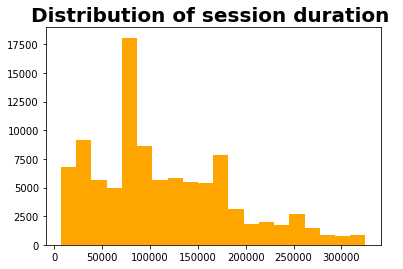

In [84]:
outlier_free = remove_outliers(univariate_analysis, ['Dur. (ms)','Youtube(UL/DL)', 'Netflix(UL/DL)', 'Google(UL/DL)', 'Gaming(UL/DL)', 'Email(UL/DL)', 'Social Media(Ul/DL)'])
plt.hist(outlier_free['Dur. (ms)'],bins=20, color='orange')
plt.title(f'Distribution of session duration ', size=20, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Youtube application data usage ')

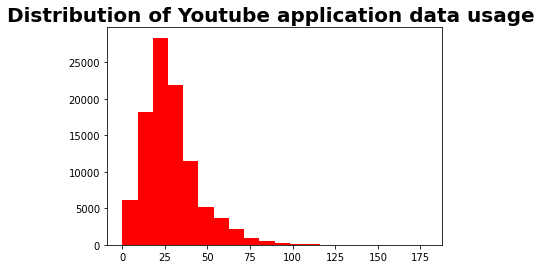

In [85]:
plt.hist(outlier_free['Youtube(UL/DL)'],bins=20, color='red')
plt.title(f'Distribution of Youtube application data usage ', size=20, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Netflix application data usage ')

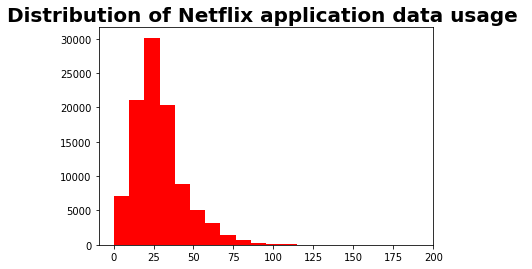

In [86]:
plt.hist(outlier_free['Netflix(UL/DL)'],bins=20, color='red')
plt.title(f'Distribution of Netflix application data usage ', size=20, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Gaming application data usage ')

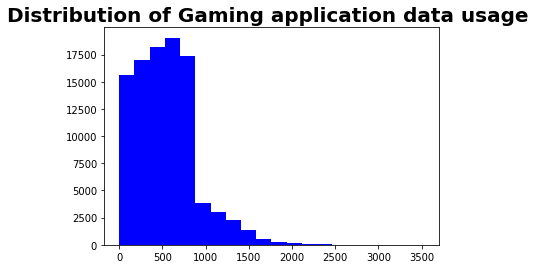

In [87]:
plt.hist(outlier_free['Gaming(UL/DL)'],bins=20, color='blue')
plt.title(f'Distribution of Gaming application data usage ', size=20, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Email application data usage ')

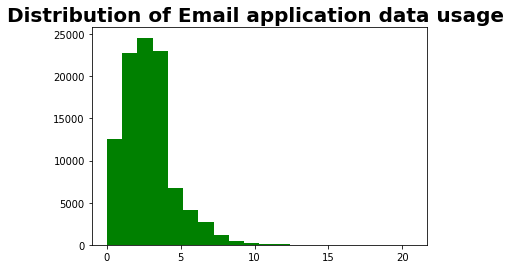

In [89]:
plt.hist(outlier_free['Email(UL/DL)'],bins=20, color='green')
plt.title(f'Distribution of Email application data usage ', size=20, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Other application data usage ')

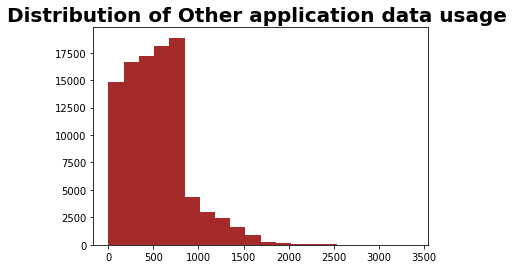

In [90]:
plt.hist(outlier_free['Other(UL/DL)'],bins=20, color='brown')
plt.title(f'Distribution of Other application data usage ', size=20, fontweight='bold')

* BAVARIATE ANALYSIS

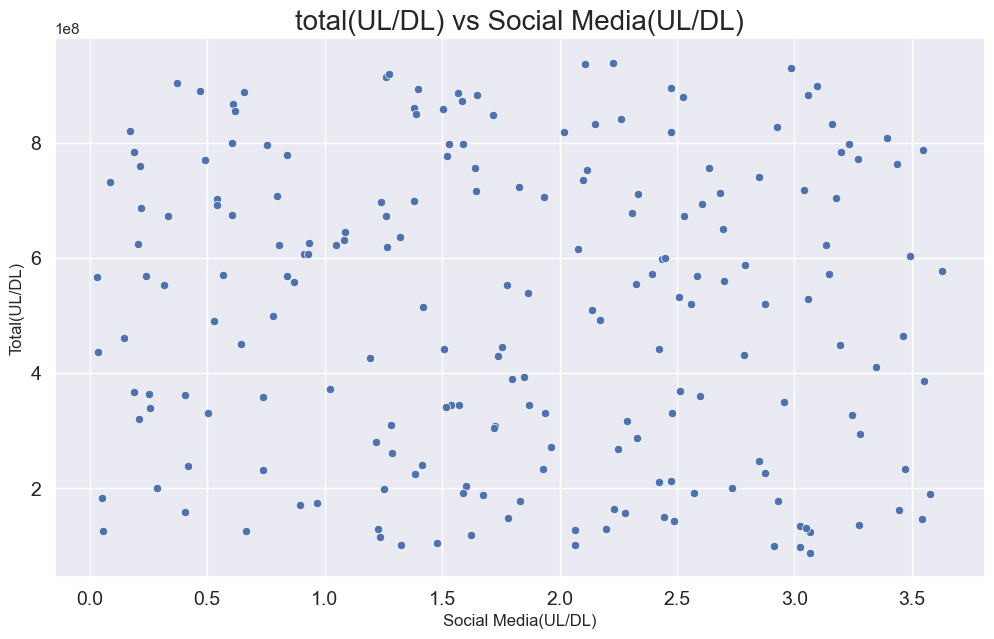

In [47]:
univariate.plot_scatter(filled.head(200), x_col="Social Media(UL/DL)", y_col="Total(UL/DL)", title="total(UL/DL) vs Social Media(UL/DL)")

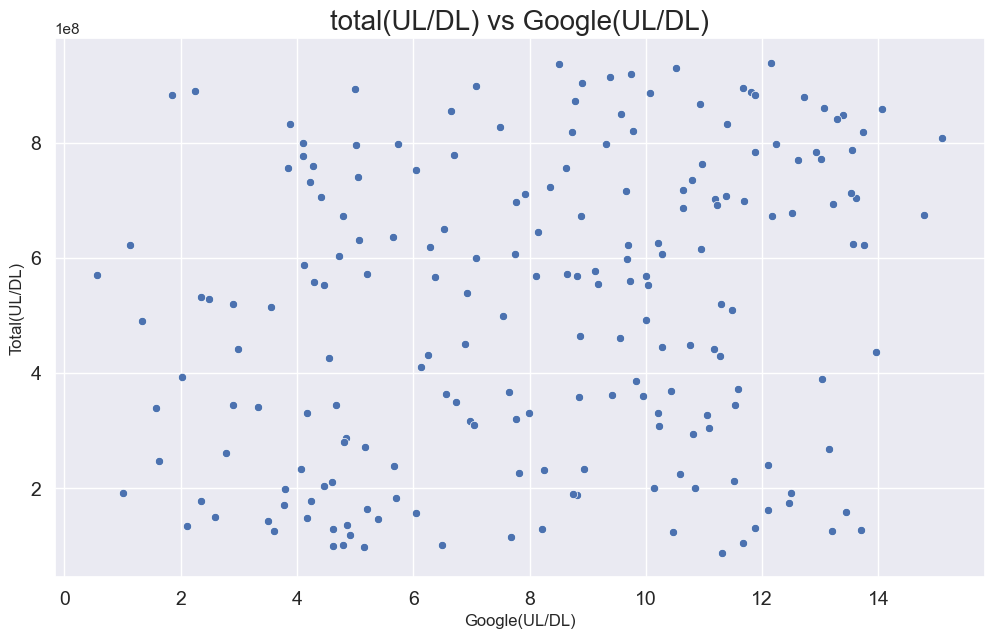

In [48]:
univariate.plot_scatter(filled.head(200), x_col="Google(UL/DL)", y_col="Total(UL/DL)", title="total(UL/DL) vs Google(UL/DL)")

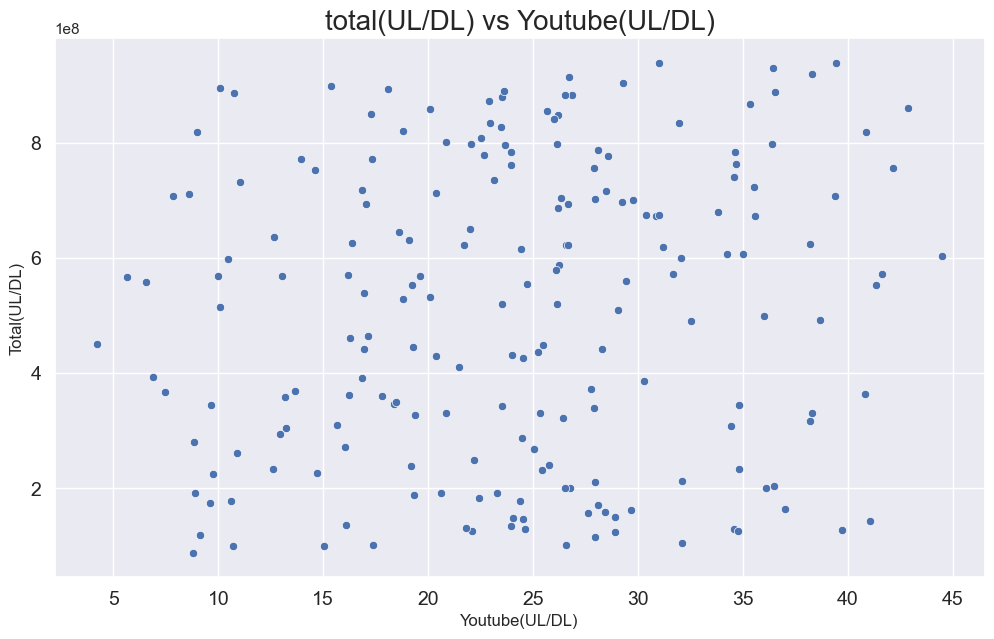

In [49]:
univariate.plot_scatter(filled.head(200), x_col="Youtube(UL/DL)", y_col="Total(UL/DL)", title="total(UL/DL) vs Youtube(UL/DL)")

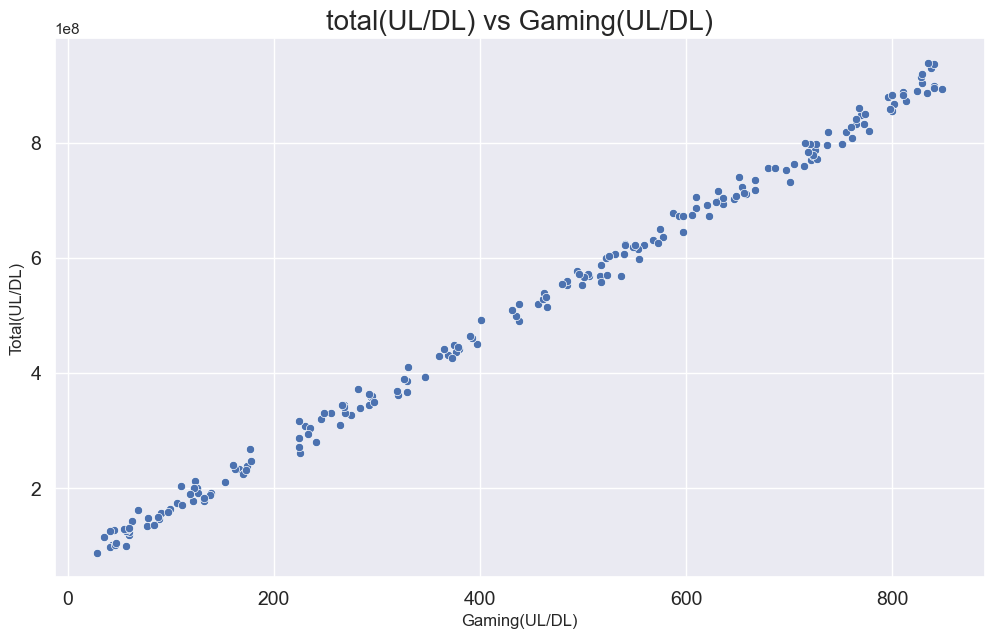

In [50]:
univariate.plot_scatter(filled.head(200), x_col="Gaming(UL/DL)", y_col="Total(UL/DL)", title="total(UL/DL) vs Gaming(UL/DL)")

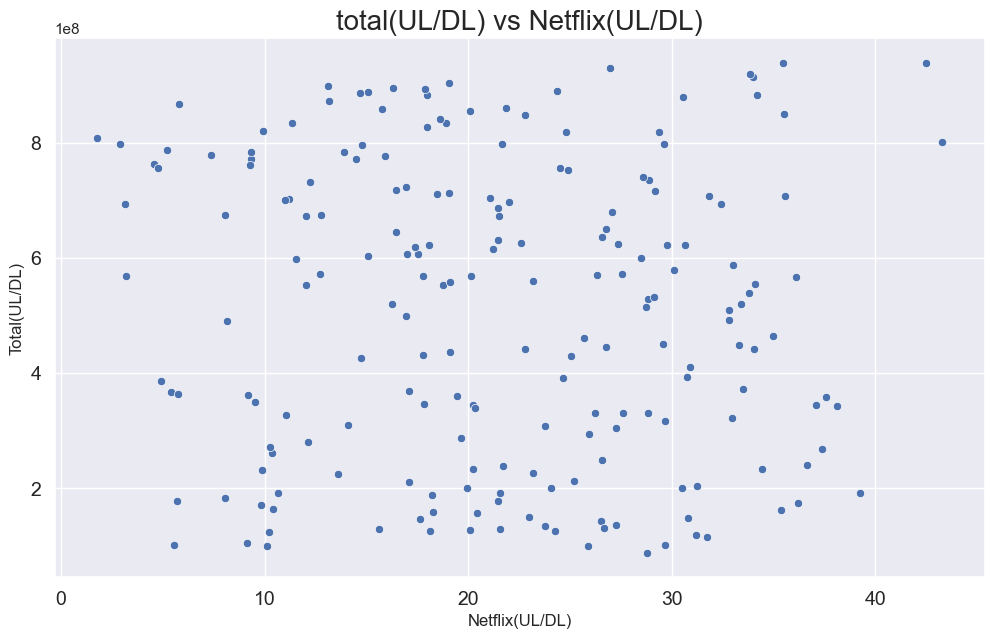

In [51]:
univariate.plot_scatter(filled.head(200), x_col="Netflix(UL/DL)", y_col="Total(UL/DL)", title="total(UL/DL) vs Netflix(UL/DL)")

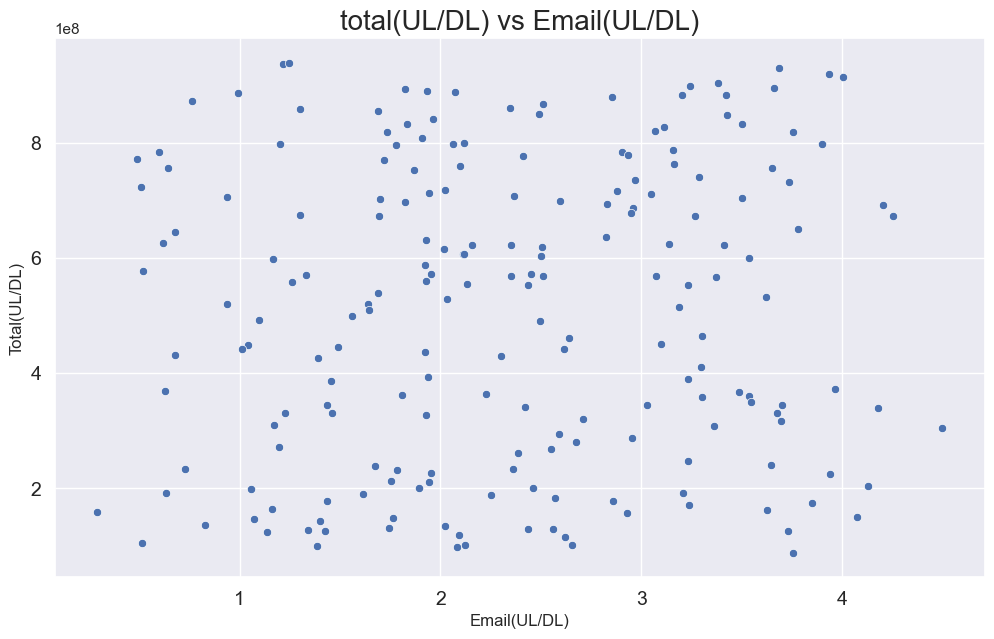

In [52]:
univariate.plot_scatter(filled.head(200), x_col="Email(UL/DL)", y_col="Total(UL/DL)", title="total(UL/DL) vs Email(UL/DL)")

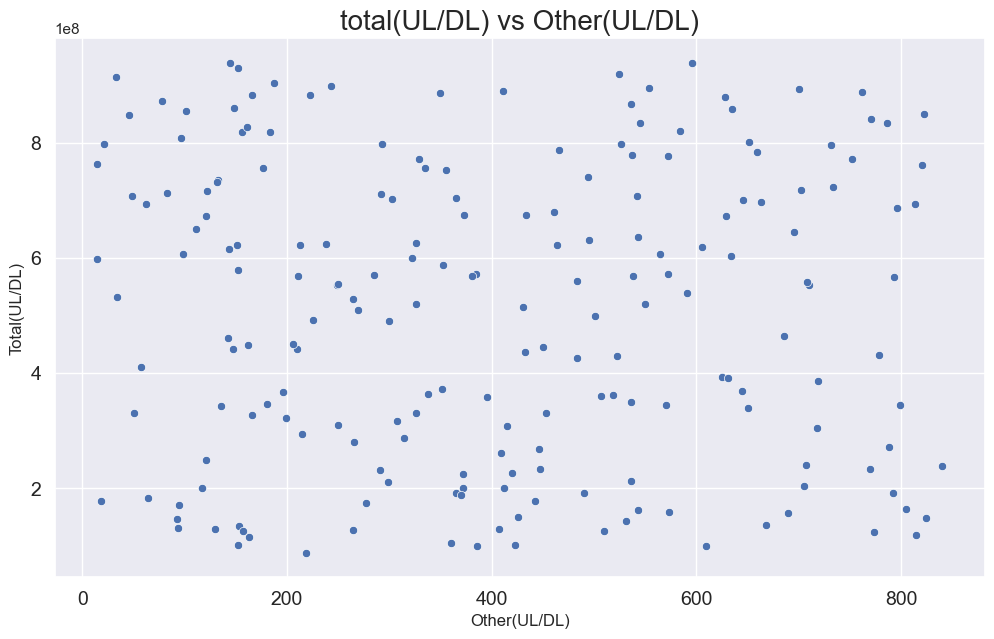

In [53]:
univariate.plot_scatter(filled.head(200), x_col="Other(UL/DL)", y_col="Total(UL/DL)", title="total(UL/DL) vs Other(UL/DL)")

* VARIABLE TRANSFORMATION

In [54]:
var_tran = filled.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum', 'Total(UL/DL)':'sum'}).reset_index()
var_tran.head(3)

,MSISDN/Number,Dur. (ms),Total(UL/DL)
0,"33,601,001,722.00","116,720.00","878,690,574.00"
1,"33,601,001,754.00","181,230.00","156,859,643.00"
2,"33,601,002,511.00","134,969.00","595,966,483.00"


In [55]:
#segment the users into top five decile classes based on the total duration for all sessions
var_tran['decile_rank'] = pd.qcut(var_tran['Dur. (ms)'],q=5,labels=False)
var_tran.tail(10)


,MSISDN/Number,Dur. (ms),Total(UL/DL),decile_rank
106846,"33,789,953,832.00","209,051.00","1,540,055,115.00",4
106847,"33,789,955,678.00","98,826.00","645,777,687.00",2
106848,"33,789,960,306.00","157,069.00","710,287,575.00",3
106849,"33,789,967,113.00","160,461.00","208,123,067.00",3
106850,"33,789,980,299.00","210,389.00","1,094,693,386.00",4
106851,"33,789,996,170.00","8,810.00","714,641,641.00",0
106852,"33,789,997,247.00","140,988.00","480,307,335.00",3
106853,"3,197,020,000,000.00","877,385.00","232,123,971.00",4
106854,"337,000,000,000,000.00","253,030.00","596,287,824.00",4
106855,"882,397,000,000,000.00","869,844.00","139,153,646.00",4


In [56]:
#compute the total data (DL+UL) per decile class. 
var_tran.groupby('decile_rank')['Total(UL/DL)'].sum()

decile_rank
0   11,548,687,049,832.00
1   12,570,642,514,190.00
2   11,570,143,480,238.00
3   13,974,333,905,200.00
4   24,701,385,490,590.50
Name: Total(UL/DL), dtype: float64

* CORRELATION ANALYSIS

In [57]:
# dropping MSISDN/Number column
cor_an = filled.groupby('MSISDN/Number').agg({'Social Media(UL/DL)':'sum', 'Google(UL/DL)':'sum',
                                               'Email(UL/DL)':'sum', 'Youtube(UL/DL)':'sum', 'Netflix(UL/DL)':'sum',
                                              'Gaming(UL/DL)':'sum', 'Other(UL/DL)':'sum'}).reset_index()
cor_an['decile_rank'] = pd.qcut(var_tran['Dur. (ms)'],q=5,labels=False)
cor_an.head()

,MSISDN/Number,Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL),decile_rank
0,"33,601,001,722.00",2.23,4.39,1.33,21.62,27.18,812.46,386.57,2
1,"33,601,001,754.00",2.66,5.33,3.31,12.43,11.22,119.75,281.71,3
2,"33,601,002,511.00",3.20,3.44,3.21,21.33,19.35,538.83,501.69,3
3,"33,601,007,832.00",0.28,9.68,2.28,6.98,1.94,391.13,35.28,0
4,"33,601,008,617.00",2.91,18.50,3.31,41.53,49.20,"1,314.80",804.80,0


<AxesSubplot:>

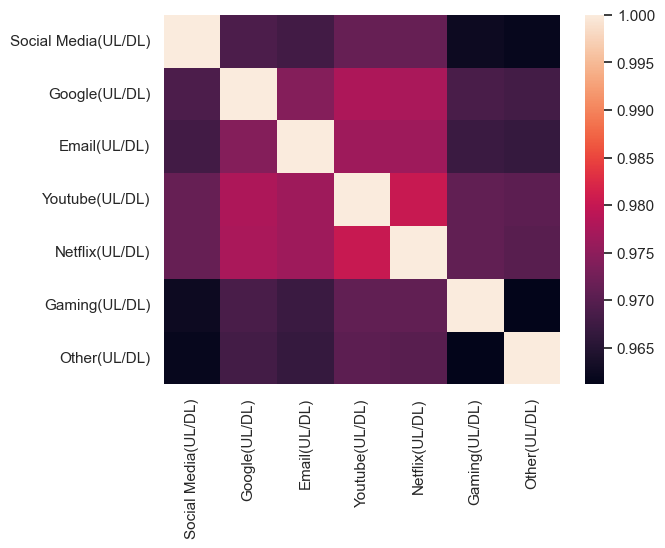

In [58]:
apk = cor_an[['Social Media(UL/DL)','Google(UL/DL)','Email(UL/DL)','Youtube(UL/DL)','Netflix(UL/DL)','Gaming(UL/DL)','Other(UL/DL)']]
cor = apk.corr()
sns.heatmap(cor)